# CNN mnist dataset

In [1]:
import tensorflow as tf
mnist=tf.keras.datasets.mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train=tf.keras.utils.normalize(x_train, axis=1)
x_test=tf.keras.utils.normalize(x_test, axis=1)

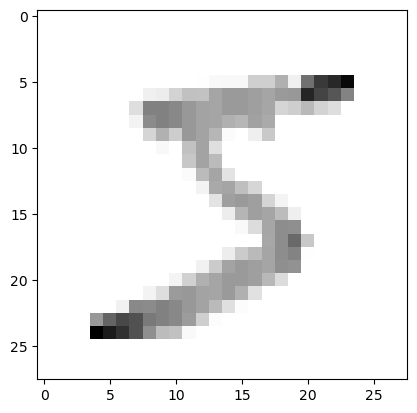

In [3]:
import matplotlib.pyplot as plt 

plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()


In [4]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())  # flatten our 28 x 28 grid
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # last layer number is always how many classifications
# used softmax for probability distribution.

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2646 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1070 - accuracy: 0.9667
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0735 - accuracy: 0.9765
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0531 - accuracy: 0.9834
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0411 - accuracy: 0.9864
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0300 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0248 - accuracy: 0.9920
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0212 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0168 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.015

In [5]:
val_loss, val_acc=model.evaluate(x_test, y_test)
print(val_loss, val_acc)
#expect out of sample accuracy to be slightly lower and your loss slightly higher. if alot more may be overfit.

313/313 [==============================] - 1s 1ms/step - loss: 0.1165 - accuracy: 0.9736
0.1164541020989418 0.9735999703407288


In [6]:
model.save('num_reader.model') # save model




INFO:tensorflow:Assets written to: num_reader.model\assets


INFO:tensorflow:Assets written to: num_reader.model\assets


In [7]:
new_model=tf.keras.models.load_model('num_reader.model')

predictions= new_model.predict([x_test]) # always takes a list

print(predictions) # creates a one-hot array, our prob. distributions. use numpy


313/313 [==============================] - 1s 2ms/step
[[2.2983172e-13 4.4405916e-11 5.2586487e-11 ... 1.0000000e+00
  5.4565463e-14 1.3063131e-10]
 [1.7418104e-13 5.4938809e-10 1.0000000e+00 ... 3.9420947e-14
  7.5551077e-16 4.9985568e-24]
 [3.9683323e-10 9.9999416e-01 5.7214908e-09 ... 3.6503718e-06
  2.0198045e-06 3.2766966e-12]
 ...
 [2.3726761e-12 6.0812144e-10 1.8531796e-11 ... 2.9970735e-08
  3.3143101e-07 3.2053316e-07]
 [2.7343311e-10 5.5049841e-12 4.9812320e-14 ... 3.4327413e-10
  1.5210228e-06 7.1949726e-16]
 [4.6716981e-09 3.8332258e-11 4.7106273e-06 ... 1.3862290e-13
  1.7592040e-08 1.2054075e-11]]


In [8]:
import numpy as np

print(np.argmax(predictions[0]))

7


<function matplotlib.pyplot.show(close=None, block=None)>

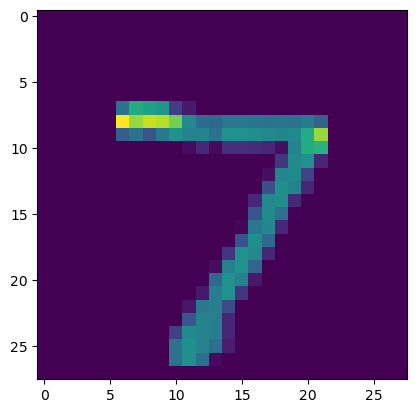

In [9]:
plt.imshow(x_test[0])
plt.show

In [13]:
print(np.argmax(predictions[32]))

3


<function matplotlib.pyplot.show(close=None, block=None)>

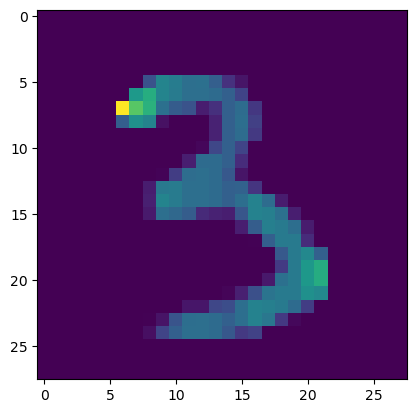

In [14]:
plt.imshow(x_test[32])
plt.show